In [1]:
import sys
sys.path.append('./../')

import ikamoana.fisherieseffort.fisherieseffort as fe
from ikamoana.ikamoanafields import (
    ikamoanafields,
    fieldsdatastructure
)
from ikamoana.feedinghabitat import (
    feedinghabitat,
    feedinghabitatconfigreader
)
import xarray as xr
import numpy as np


#xml_filepath="./../data/SEAPODYM_data/run-test/skj_interim_CL_2018_testopt.xml"
SEAPODYM_filepath = "./../data/SEAPODYM_data/run-test/skj_CLT_e5_3_est.xml"
IKAMOANA_filepath = "./IkaSim_DensityTest.xml"
fisheries_xml_filepath="./../data/SEAPODYM_data/run-test/data/fisheries/skj_fisheries_data_2021_Nov17.txt"

## Initialize

In [4]:
fh = feedinghabitat.FeedingHabitat(SEAPODYM_filepath)
# ikaf = ikamoanafields.IkamoanaFields(
#    IKAMOANA_filepath, SEAPODYM_filepath,
#    feeding_habitat=fh.computeFeedingHabitat(0)['Feeding_Habitat_Cohort_0'])
ikaf = ikamoanafields.IkamoanaFields(IKAMOANA_filepath)
#ikaf.feeding_habitat_structure.data_structure.normalizeCoords()

In [3]:
Tx, Ty = ikaf.computeTaxis(0)

---


In [49]:
# Create Ikamoana habitat from Inna's habitat

import sys
sys.path.append('./../')
import numpy as np
import ikamoana as ika 
import xml.etree.ElementTree as ET
tree = ET.parse('./IkaSim_DensityTest.xml')
root = tree.getroot()

# ika_file = 'C:/Users/joes/Dropbox/SPC_2020/OFP-Ikamoana/Ikamoana/ikamoana/IkaSim_DensityTest.xml'
ika_file = './IkaSim_DensityTest.xml'

IkaTest = ika.ikamoana.IkaSim(ika_file)

#IkaTest.forcing_gen.feeding_habitat_structure.correctEpiTempWithVld()

IkaTest.generateForcingNEW()

my_hab = IkaTest.forcing['H']
my_hab.to_netcdf('./../../../../../Téléchargements/Habitat_Ikamoana.nc')

other_hab = xr.open_dataarray('./../data/Inna/skj_cohort_habitat_20080115-20080515_20080115.nc')
other_hab = other_hab[0]
other_hab = other_hab.drop_vars('Time')
other_hab = other_hab.assign_coords({"time":("mean_age", my_hab.time.data),
                                     "cohorts":("mean_age",[5,6,7,8,9])})
other_hab = other_hab.swap_dims({"mean_age":"time"})
other_hab = other_hab.drop_vars('mean_age')
other_hab = other_hab.loc[:,-39.5:50.5,119.5:289.5]
other_hab = other_hab.rename({'longitude':'lon','latitude':'lat'})
other_hab.attrs = my_hab.attrs
other_hab.to_netcdf('./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc')

---

In [1]:
import sys
sys.path.append('./../')
import numpy as np
import ikamoana as ika
import xarray as xr
import xml.etree.ElementTree as ET
tree = ET.parse('./IkaSim_DensityTest.xml')
root = tree.getroot()

In [10]:
# ika_file = 'C:/Users/joes/Dropbox/SPC_2020/OFP-Ikamoana/Ikamoana/ikamoana/IkaSim_DensityTest.xml'
ika_file = './IkaSim_DensityTest.xml'

IkaTest = ika.ikamoana.IkaSim(ika_file)

# No VLD correction

193617070.0
0.1575282
0.9045079


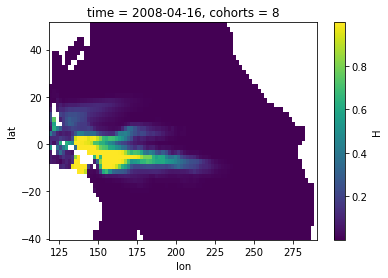

In [11]:
IkaTest.generateForcingNEW()
# IkaTest.generateForcingNEW(
#     from_habitat=xr.open_dataarray('./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc')
# )
print(IkaTest.forcing['K'].sum().data)
print(IkaTest.forcing['dK_dx'].sum().data)
print(IkaTest.forcing['dK_dy'].sum().data)

IkaTest.forcing['H'][3].plot()

# VLD correction

 It will also add +1 to sigma_min. Cf. function documentation for more details.
182479100.0
2.2612607
1.937542


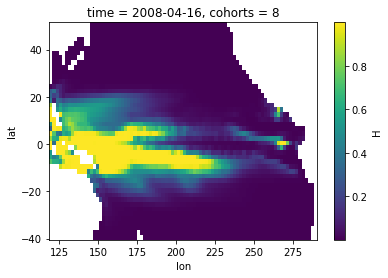

In [12]:
IkaTest.forcing_gen.feeding_habitat_structure.correctEpiTempWithVld()

IkaTest.generateForcingNEW()
# IkaTest.generateForcingNEW(
#     from_habitat=xr.open_dataarray('./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc')
# )
print(IkaTest.forcing['K'].sum().data)
print(IkaTest.forcing['dK_dx'].sum().data)
print(IkaTest.forcing['dK_dy'].sum().data)

IkaTest.forcing['H'][3].plot()

# Inna's habitat

186955870.0
-0.028697833
0.5759071


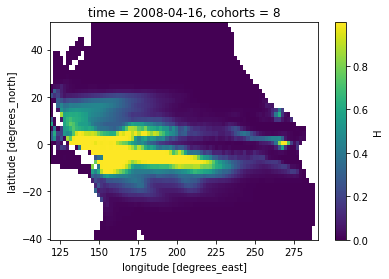

In [13]:
# IkaTest.generateForcingNEW()
IkaTest.generateForcingNEW(
    from_habitat=xr.open_dataarray('./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc')
)
print(IkaTest.forcing['K'].sum().data)
print(IkaTest.forcing['dK_dx'].sum().data)
print(IkaTest.forcing['dK_dy'].sum().data)

IkaTest.forcing['H'][3].plot()